Os padrões de segmentação de clientes também são informações importantes para entender o perfil de cada tipo de comprador, de forma que as estratégias de marketing e vendas sejam adaptadas conforme necessário.

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Carregar os dados
dados = pd.read_csv('dados\dataset-store.csv')
dados.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Regiao,ID_Produto,Categoria,Nome_Produto,Valor_Venda,Quantidade
0,CA-2016-152156,2016-11-08,CG-12520,Consumer,United States,South,FUR-BO-10001798,Furniture,Bush Somerset Collection Bookcase,261.9600,NaN
1,CA-2016-152156,2016-11-08,CG-12520,Consumer,United States,South,FUR-CH-10000454,Furniture,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,NaN
2,CA-2016-138688,2016-06-12,DV-13045,Corporate,United States,West,OFF-LA-10000240,Office Supplies,Self-Adhesive Address Labels for Typewriters b...,14.6200,2.0
3,US-2015-108966,2015-10-11,SO-20335,Consumer,United States,South,FUR-TA-10000577,Furniture,Bretford CR4500 Series Slim Rectangular Table,957.5775,5.0
4,US-2015-108966,2015-10-11,SO-20335,Consumer,United States,South,OFF-ST-10000760,Office Supplies,Eldon Fold 'N Roll Cart System,22.3680,2.0


O valor médio do pedido por cliente é calculado agrupando os dados pelo ID do Cliente e calculando a média os valores de venda.

In [3]:

# Calcular a frequência de compra e valor médio do pedido por cliente
frequencia_compra = dados.groupby('ID_Cliente')['ID_Pedido'].nunique().reset_index()
frequencia_compra.columns = ['ID_Cliente', 'Frequencia_Compra']

valor_medio_pedido = dados.groupby('ID_Cliente')['Valor_Venda'].mean().reset_index()
valor_medio_pedido.columns = ['ID_Cliente', 'Valor_Medio_Pedido']

Os dados são normalizados subtraindo a média e dividindo pelo desvio padrão, para evitar que variáveis com escalas diferentes influenciem excessivamente a clusterização.

Então, aplica-se o algoritmo K-Means da biblioteca sklearn.cluster para clusterizar os clientes com base na frequência de compra e valor médio do pedido. Nesse caso, foi definido que 4 clusters de clientes deveriam ser gerados.

In [4]:

# Combinar as duas métricas em um DataFrame
dados_clientes = pd.merge(frequencia_compra, valor_medio_pedido, on='ID_Cliente')

# Normalizar os dados
dados_clientes_norm = (dados_clientes - dados_clientes.mean()) / dados_clientes.std()

# Aplicar o algoritmo K-Means para clusterização
kmeans = KMeans(n_clusters=4, random_state=42)
dados_clientes_norm['Cluster'] = kmeans.fit_predict(dados_clientes_norm[['Frequencia_Compra', 'Valor_Medio_Pedido']])

# Visualizar os clusters
print(dados_clientes_norm.groupby('Cluster').mean())

C:\Users\ianmw\AppData\Local\Temp\ipykernel_18848\856891256.py:5: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  dados_clientes_norm = (dados_clientes - dados_clientes.mean()) / dados_clientes.std()
C:\Users\ianmw\AppData\Local\Temp\ipykernel_18848\856891256.py:5: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  dados_clientes_norm = (dados_clientes - dados_clientes.mean()) / dados_clientes.std()
c:\Users\ianmw\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 

         Frequencia_Compra  Valor_Medio_Pedido
Cluster                                       
0                 0.979528           -0.203716
1                -0.767785           -0.451348
2                -0.188029            1.081276
3                -0.979401            5.620170


C:\Users\ianmw\AppData\Local\Temp\ipykernel_18848\856891256.py:12: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print(dados_clientes_norm.groupby('Cluster').mean())


Por fim, a média das métricas para cada cluster foi obtida, o que permite analisar o comportamento típico de cada grupo.

Alternativamente, um gráfico de dispersão é usado para representar os clusters de clientes com base na frequência de compra e valor médio do pedido.

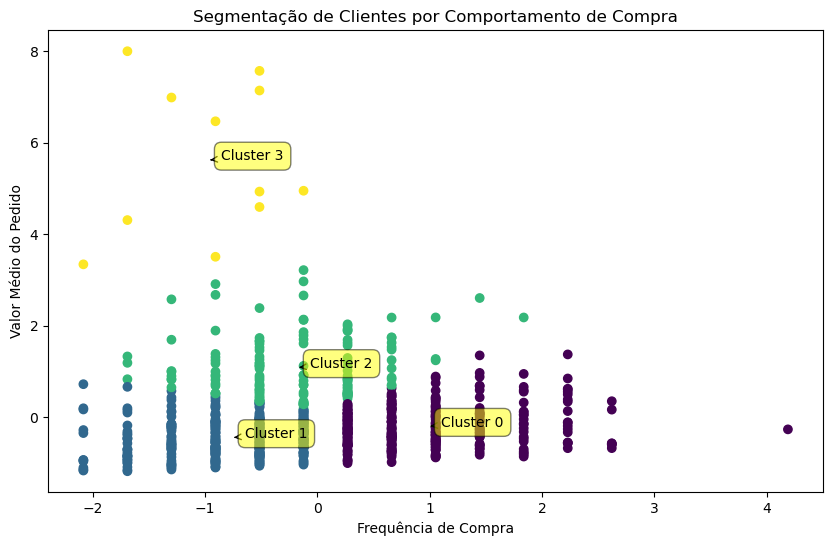

In [8]:
# Criar o gráfico de dispersão
plt.figure(figsize=(10, 6))
plt.scatter(dados_clientes_norm['Frequencia_Compra'], dados_clientes_norm['Valor_Medio_Pedido'], c=dados_clientes_norm['Cluster'], cmap='viridis')
plt.xlabel('Frequência de Compra')
plt.ylabel('Valor Médio do Pedido')
plt.title('Segmentação de Clientes por Comportamento de Compra')

# Adicionar rótulos aos clusters
for cluster in dados_clientes_norm['Cluster'].unique():
    cluster_data = dados_clientes_norm[dados_clientes_norm['Cluster'] == cluster]
    plt.annotate(
        f'Cluster {cluster}',
        xy=(cluster_data['Frequencia_Compra'].mean(), cluster_data['Valor_Medio_Pedido'].mean()),
        xytext=(10, 0),
        textcoords='offset points',
        bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
        arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0')
    )

plt.show()


No eixo horizontal, tem-se a frequência de compra, onde valores mais altos indicam clientes que realizam compras com maior frequência. No eixo vertical, tem-se o valor médio do pedido, onde valores mais altos representam clientes que gastam mais em seus pedidos.

Cada ponto no gráfico representa um cliente individual, e a cor do ponto indica o cluster ao qual esse cliente pertence, baseado na combinação de sua frequência de compra e valor médio do pedido.

Nota-se que o cluster 0 (pontos roxos) representa clientes frequentes com valor médio de pedido próximo à média geral. Oferecer programas de fidelidade ou descontos pode incentivar esse grupo a fazer compras mais valiosas.

O cluster 1 (pontos azul) representa clientes pouco frequentes com valor médio de pedido baixo. Nesse caso, será necessário avaliar as razões para a baixa frequência de compras e o valor médio, e oferecer promoções ou produtos mais acessíveis.

O cluster 2 (pontos verde) engloba clientes com frequência média, mas alto valor médio de pedido. Esses são clientes valiosos que, embora não comprem com muita frequência, tendem a gastar mais quando fazem um pedido. Para eles, pode-se oferecer produtos Premium ou serviços adicionais de valores maiores, aproveitando o alto valor de seus pedidos.

Por último, o cluster 3 (pontos amarelo) representa clientes pouco frequentes, mas com valor médio de pedido extremamente alto. Esses clientes podem ser clientes corporativos ou clientes com necessidades específicas que justificam os pedidos de alto valor, mesmo que esporádicos. Analisar os motivos para os pedidos esporádicos de valor tão alto, e focar em retê-los com ofertas exclusivas.

É importante ressaltar que a falta de contexto sobre esses dados e o negócio limitaram a análise que pode ser feita sobre essa base de dados, mas apesar disso ainda foi possível determinar muitas informações relevantes sobre o comportamento dos clientes, com 4 perfis bem definidos de compradores nesse negócio. Apesar disso, essa segmentação permitiu entender melhor os diferentes perfis de clientes de forma que as estratégias de marketing e vendas possam ser adaptadas para atender às necessidades e comportamentos específicos de cada grupo.